In [2]:
#Data processing
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import time
#from nptdms import TdmsFile #Process raw ramping file


Bad key "text.kerning_factor" on line 4 in
/uscms_data/d3/dhoang/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
def load_sensor(dir_path, sensor, time_range = None):
    
    data = pd.DataFrame(data = {sensor: np.load(dir_path + sensor + ".npy"),
                                "time": np.load(dir_path + "time.npy")})
    
    start = min(data["time"])
    end = max(data["time"])
    
    if time_range:
        start = time_range[0]
        end = time_range[1]
    
    
    data = data[(data["time"] > start) & (data["time"] < end)]
   
    %reset -f in
    
    return data[sensor]

def load_time(dir_path, time_range = None):
    
    tdata = np.load(dir_path + "time.npy")
    
    start = min(tdata)
    end = max(tdata)
    
    if time_range:
        start = time_range[0]
        end = time_range[1]
    
    
    tdata = tdata[(tdata > start) & (tdata < end)]
   
    %reset -f in
    
    return tdata

def thres_cross(array):
    
    thres_cross = ((array > 0.009) & (array < 0.013)).sum()/array.size
    
    return thres_cross

def plot_thres_crossings(dir_path, channel, time_range = None, window = 2000, step = 10):
    
    time_axis = load_time(dir_path, time_range)[window-1::step]
    sensor = load_sensor(dir_path, channel, time_range = time_range).abs().rolling(window=window).apply(thres_cross, raw = True).to_numpy()[window-1::step]
    
    #Zero crossings plot
    plt.figure(figsize=(20,2))
    plt.plot(time_axis, sensor,
             label = "Number of threshold crossings",
             color = 'orange')
    plt.xlabel("Time (s)")
    plt.title("Variable {}'s threshold crossings".format(channel))
    plt.show()
    
    %reset -f in
    
def plot_thres_crossings_product(dir_path, time_range = None, window = 2000, step = 10):
    time_axis = load_time(dir_path, time_range)[window-1::step]
    ai0 = load_sensor(dir_path, "ai0", time_range = time_range).abs().rolling(window=window).apply(thres_cross, raw = True).to_numpy()[window-1::step]
    ai1 = load_sensor(dir_path, "ai1", time_range = time_range).abs().rolling(window=window).apply(thres_cross, raw = True).to_numpy()[window-1::step]
    ai2 = load_sensor(dir_path, "ai2", time_range = time_range).abs().rolling(window=window).apply(thres_cross, raw = True).to_numpy()[window-1::step]
    ai3 = load_sensor(dir_path, "ai3", time_range = time_range).abs().rolling(window=window).apply(thres_cross, raw = True).to_numpy()[window-1::step]
    ai4 = load_sensor(dir_path, "ai4", time_range = time_range).abs().rolling(window=window).apply(thres_cross, raw = True).to_numpy()[window-1::step]
    
    product = ai0*ai1*ai2*ai3*ai4
    
    #Plot
    plt.figure(figsize=(20,2))
    plt.plot(time_axis, product)
    plt.xlabel("Time (s)")
    plt.title("Product of thres hold crossings across all sensors.")
    
def plot_amplitude_distribution(dir_path, channel, time_range, bins = 10000, log = True):
    
    amplitude = load_sensor(dir_path, channel, time_range).abs()
    
    sns.distplot(amplitude, bins = bins)
    
    #plt.xlim(limit)
    plt.xscale('log')
    plt.title('Distribution of the amplitude of signal in {}, Sensor {}.'.format(dir_path[7:], channel))
    plt.grid(True)

def plot_amp_with_time(dir_path, channel, time_range, log = True):
    
    amplitude = load_sensor(dir_path, channel, time_range).abs()
    time_axis = load_time(dir_path, time_range)
    
    
    
    plt.figure(figsize=(20,2))
    plt.plot(time_axis, amplitude)
    plt.yscale('log')
    plt.ylim(bottom = 10e-3)
    plt.title('Amplitude of signal in {}, Sensor {}.'.format(dir_path[7:], channel))
    plt.xlabel("Time (s)")
    plt.grid(True)

## EXP

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


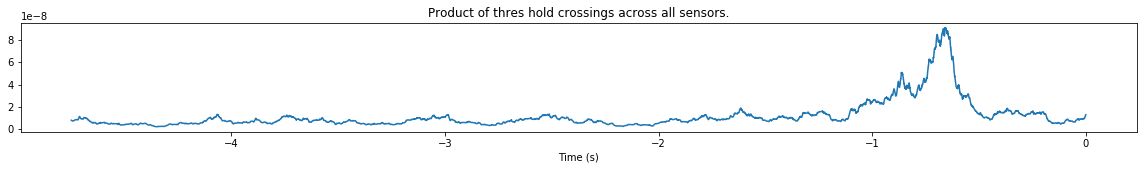

In [3]:
#Threshold 0.01;0.012
plot_thres_crossings_product("./data/Ramp22/", time_range = (-5, 0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


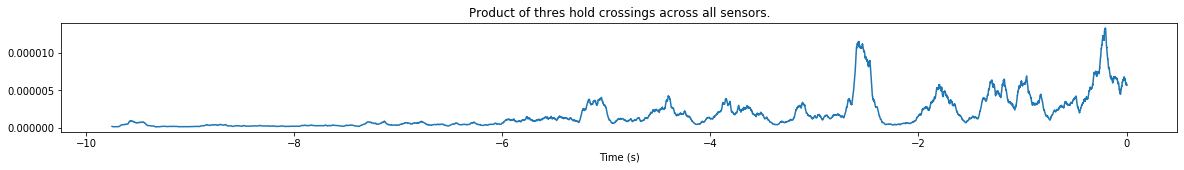

In [6]:
#Threshold 0.01;0.012
plot_thres_crossings_product("./data/Ramp23/", time_range = (-10, 0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


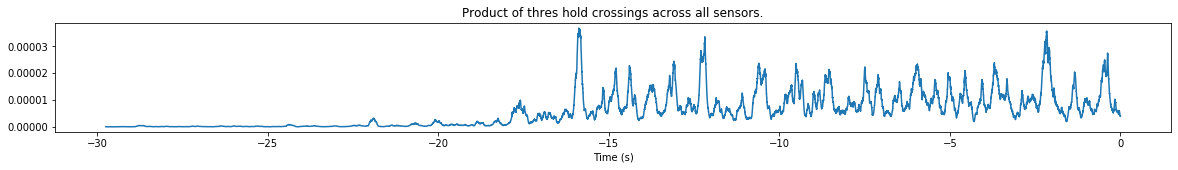

In [7]:
#Threshold 0.01;0.012
plot_thres_crossings_product("./data/Ramp24/", time_range = (-30, 0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


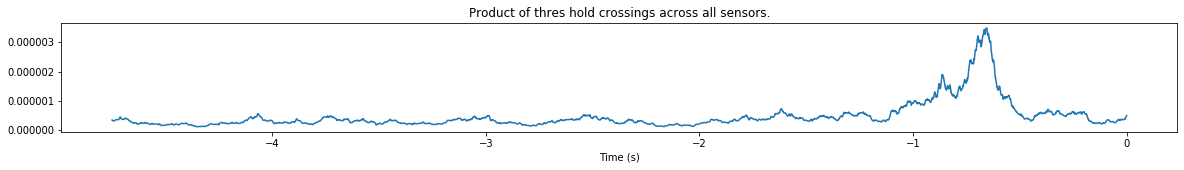

In [6]:
#Threshold 0.009;0.013
plot_thres_crossings_product("./data/Ramp22/", time_range = (-5, 0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


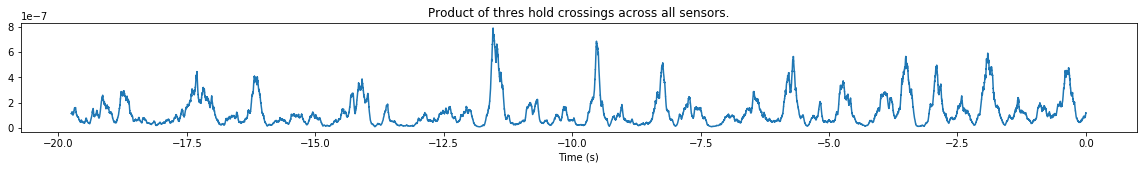

In [4]:
#Threshold 0.01;0.012
plot_thres_crossings_product("./data/Ramp20/", time_range = (-20, 0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


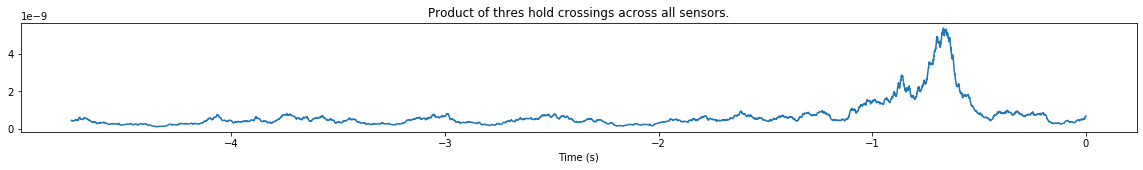

In [14]:
#Threshold 0.01;0.011
plot_thres_crossings_product("./data/Ramp22/", time_range = (-5, 0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


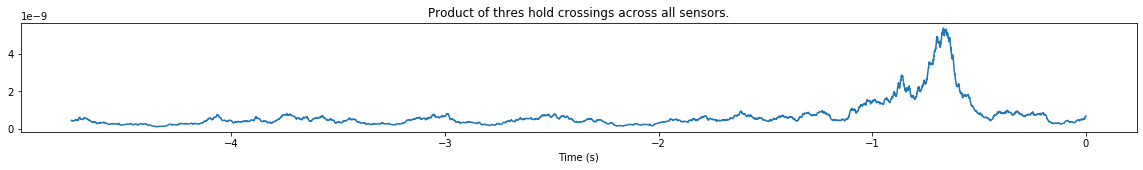

In [14]:
#Threshold 0.01;0.011
plot_thres_crossings_product("./data/Ramp22/", time_range = (-5, 0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


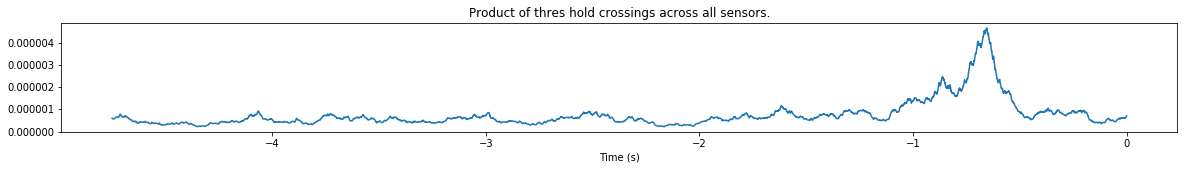

In [17]:
#Threshold 0.008;0.011
plot_thres_crossings_product("./data/Ramp22/", time_range = (-5, 0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


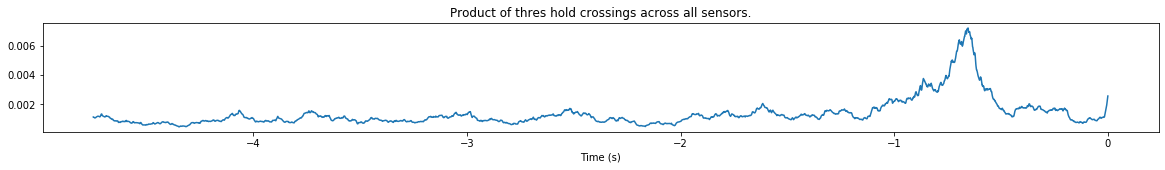

In [23]:
#Threshold 0.005
plot_thres_crossings_product("./data/Ramp22/", time_range = (-5, 0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


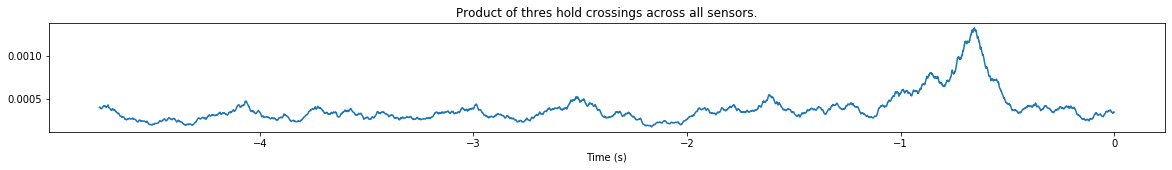

In [20]:
#Threshold 0.005;0.011
plot_thres_crossings_product("./data/Ramp22/", time_range = (-5, 0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


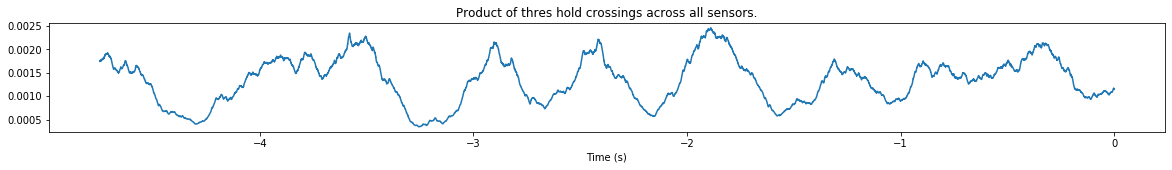

In [21]:
#Threshold 0.005;0.011
plot_thres_crossings_product("./data/Ramp20/", time_range = (-5, 0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


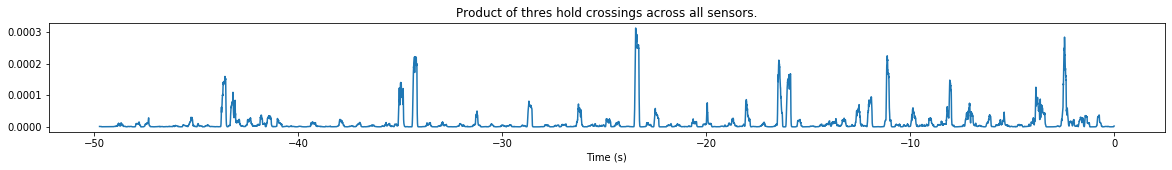

In [3]:
#Threshold 0.01; 0.1
plot_thres_crossings_product("./data/Ramp19/", time_range = (-50, 0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


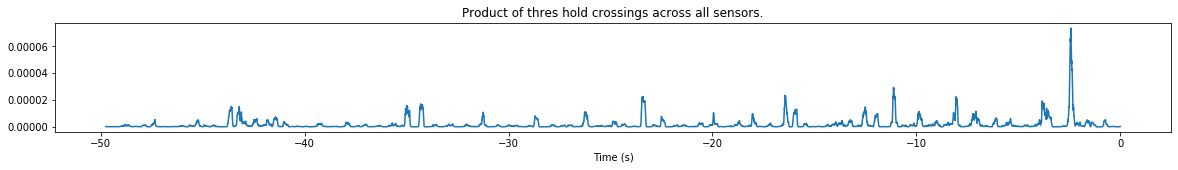

In [5]:
#Threshold 0.01; 0.02
plot_thres_crossings_product("./data/Ramp19/", time_range = (-50, 0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


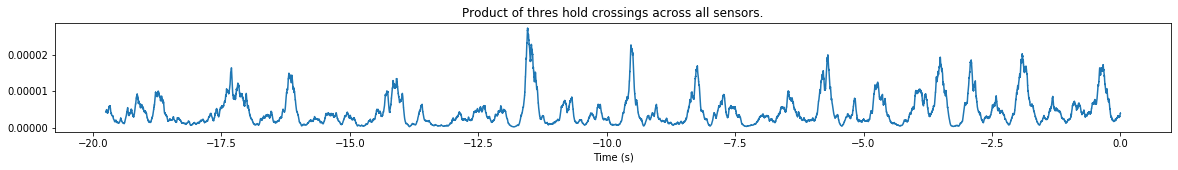

In [3]:
#Threshold 0.01; 0.03
plot_thres_crossings_product("./data/Ramp20/", time_range = (-20, 0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


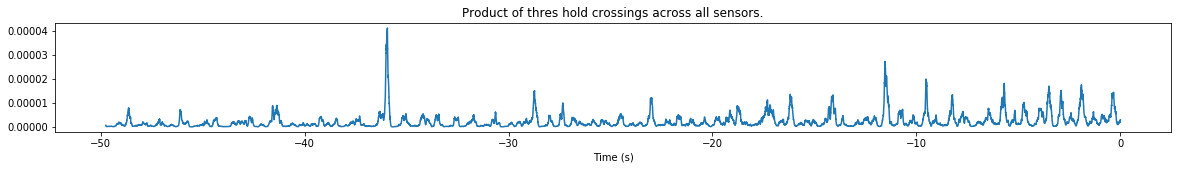

In [7]:
#Threshold 0.01; 0.015
plot_thres_crossings_product("./data/Ramp20/", time_range = (-50, 0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


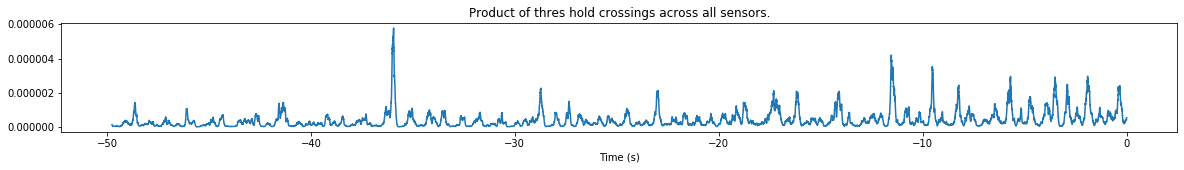

In [9]:
#Threshold 0.01; 0.013
plot_thres_crossings_product("./data/Ramp20/", time_range = (-50, 0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


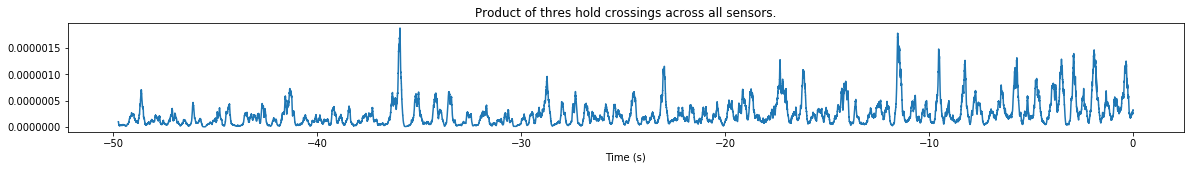

In [11]:
#Threshold 0.009; 0.011
plot_thres_crossings_product("./data/Ramp20/", time_range = (-50, 0), window = 25000)

In [13]:
#Threshold 0.01; 0.011
plot_thres_crossings_product("./data/Ramp20/", time_range = (-50, 0), window = 25000)

Flushing input history
Flushing input history
Flushing input history


KeyboardInterrupt: 

## Ramp 20 threshold crossing

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


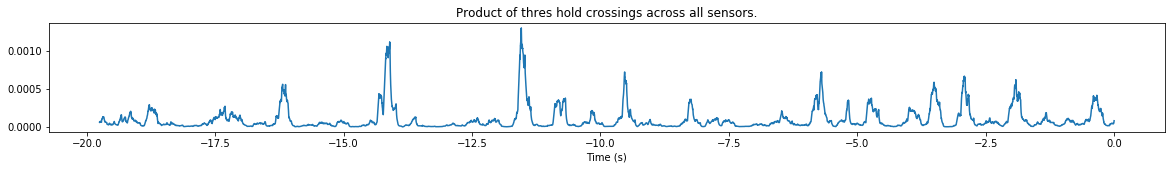

In [3]:
#Threshold 0.01
plot_thres_crossings_product("./data/Ramp20/", time_range = (-20, 0), window = 25000)

## Ramp 21 threshold crossing

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


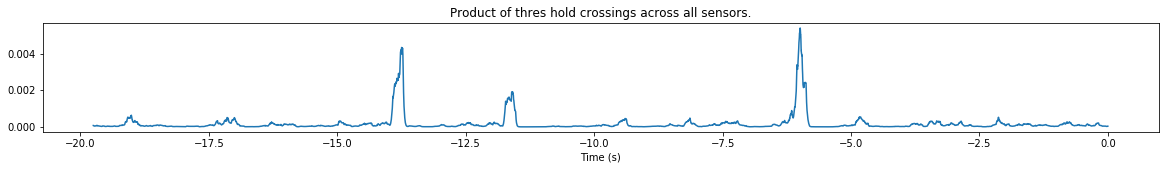

In [4]:
#Threshold 0.01
plot_thres_crossings_product("./data/Ramp21/", time_range = (-20, 0), window = 25000)

## Ramp 22 threshold crossing

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


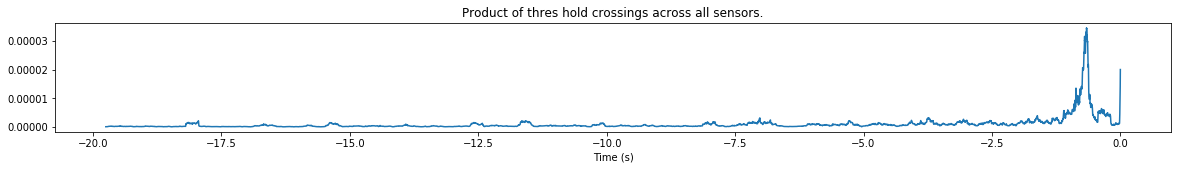

In [5]:
#Threshold 0.01
plot_thres_crossings_product("./data/Ramp22/", time_range = (-20, 0), window = 25000)

## All Ramps (window = 250ms)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


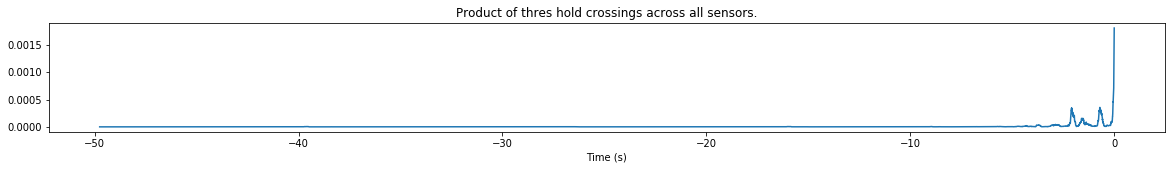

In [20]:
#Threshold 0.01
plot_thres_crossings_product("./data/Ramp4/", time_range = (-50, 0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


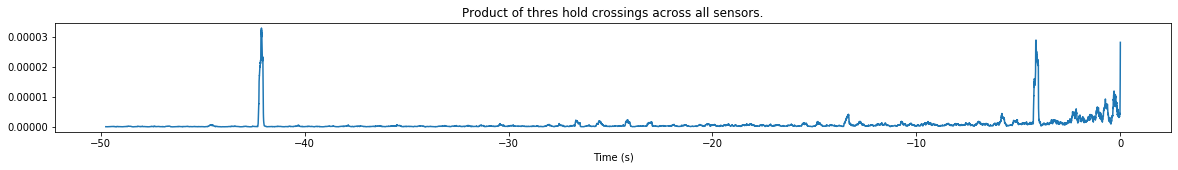

In [21]:
#Threshold 0.01
plot_thres_crossings_product("./data/Ramp5/", time_range = (-50, 0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


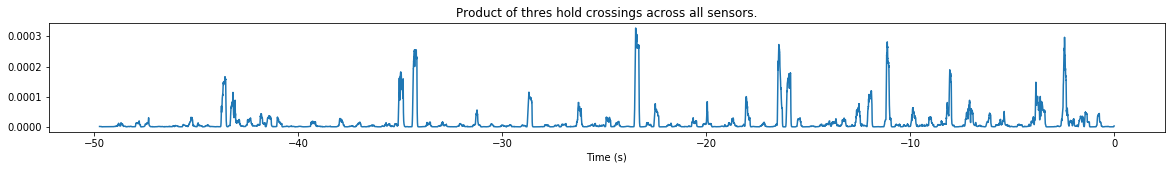

In [19]:
#Threshold 0.01
plot_thres_crossings_product("./data/Ramp19/", time_range = (-50, 0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


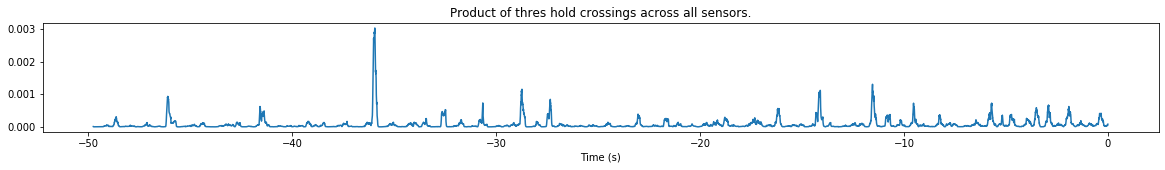

In [22]:
#Threshold 0.01
plot_thres_crossings_product("./data/Ramp20/", time_range = (-50, 0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


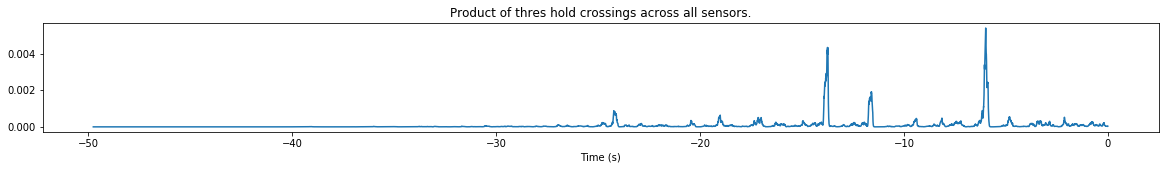

In [23]:
#Threshold 0.01
plot_thres_crossings_product("./data/Ramp21/", time_range = (-50, 0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


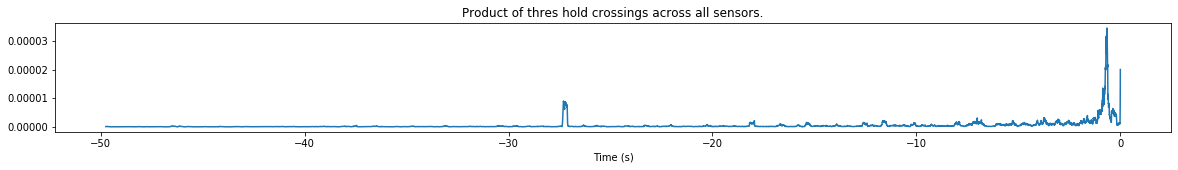

In [24]:
#Threshold 0.01
plot_thres_crossings_product("./data/Ramp22/", time_range = (-50, 0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


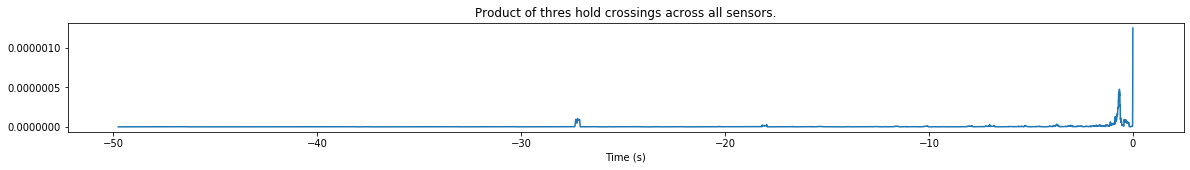

In [59]:
#Threshold 0.015
plot_thres_crossings_product("./data/Ramp22/", time_range = (-50, 0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


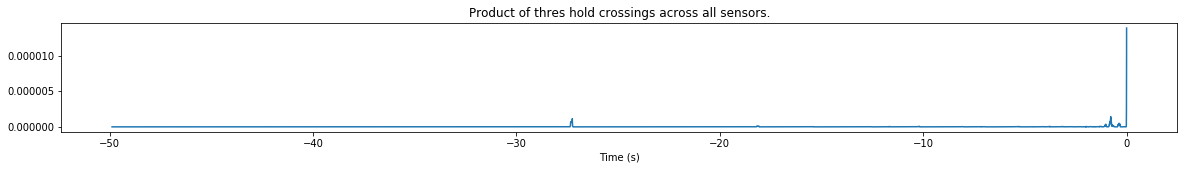

In [60]:
#Threshold 0.015
plot_thres_crossings_product("./data/Ramp22/", time_range = (-50, 0), window = 12500)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


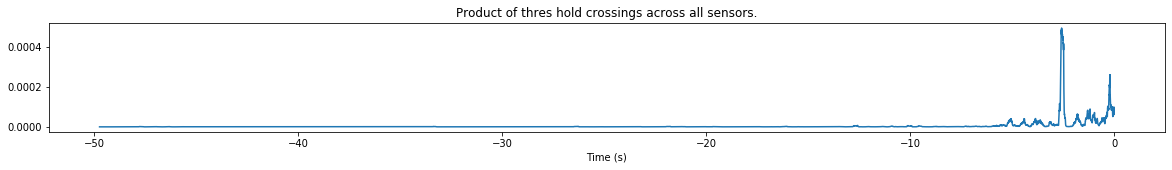

In [25]:
#Threshold 0.01
plot_thres_crossings_product("./data/Ramp23/", time_range = (-50, 0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


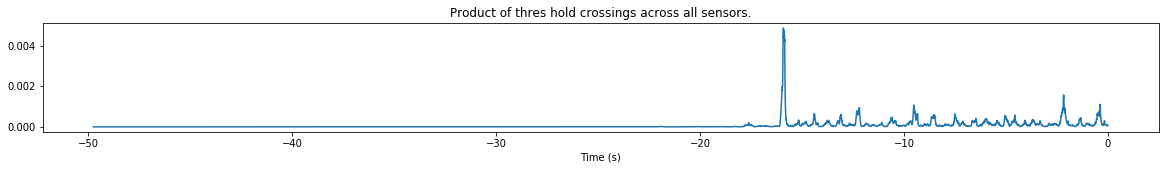

In [27]:
#Threshold 0.01
plot_thres_crossings_product("./data/Ramp24/", time_range = (-50, 0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


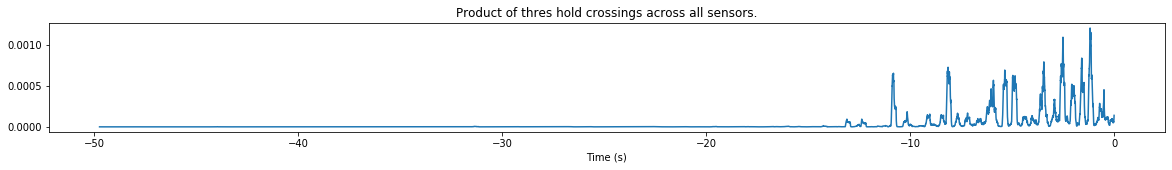

In [28]:
#Threshold 0.01
plot_thres_crossings_product("./data/Ramp25/", time_range = (-50, 0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


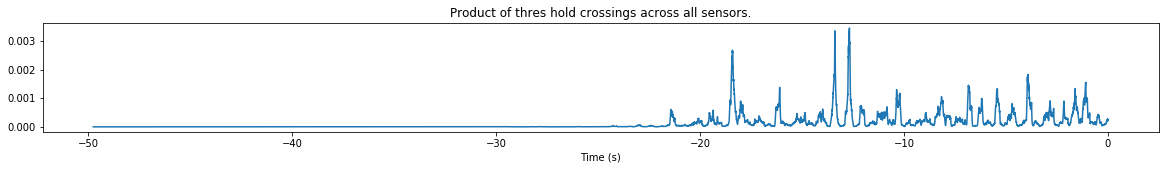

In [26]:
#Threshold 0.01
plot_thres_crossings_product("./data/Ramp26/", time_range = (-50, 0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


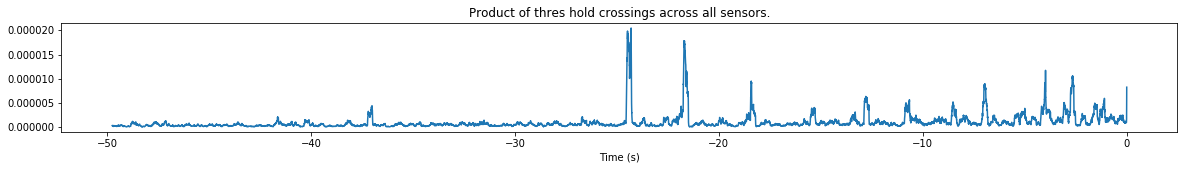

In [29]:
#Threshold 0.01
plot_thres_crossings_product("./data/Ramp27/", time_range = (-50, 0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


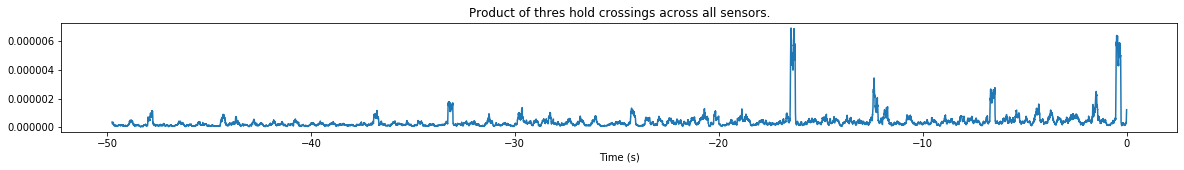

In [30]:
#Threshold 0.01
plot_thres_crossings_product("./data/Ramp28/", time_range = (-50, 0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


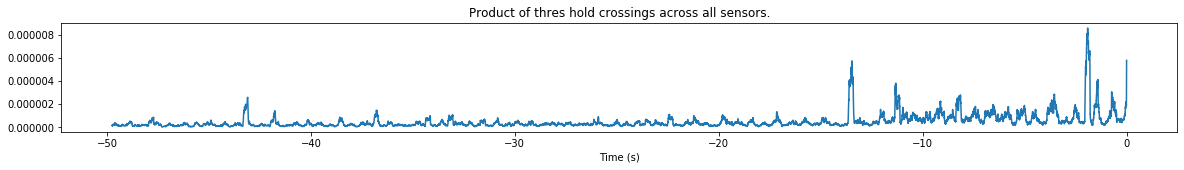

In [31]:
#Threshold 0.01
plot_thres_crossings_product("./data/Ramp29/", time_range = (-50, 0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


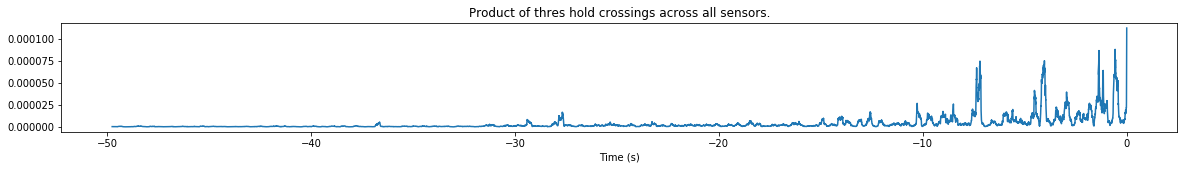

In [32]:
#Threshold 0.01
plot_thres_crossings_product("./data/Ramp30/", time_range = (-50, 0), window = 25000)

## All Ramps (window = 40ms)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


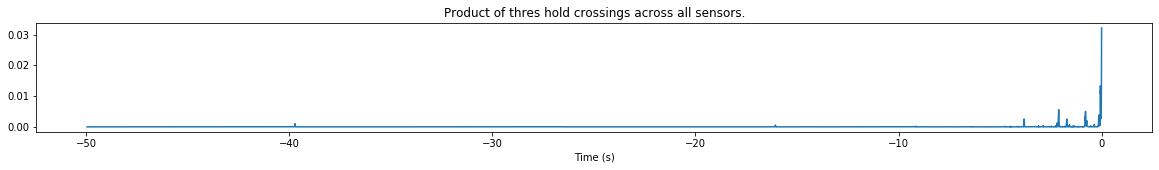

In [33]:
#Threshold 0.01
plot_thres_crossings_product("./data/Ramp4/", time_range = (-50, 0), window = 4000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


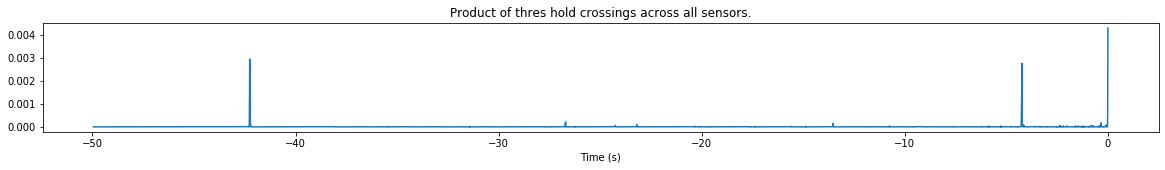

In [34]:
#Threshold 0.01
plot_thres_crossings_product("./data/Ramp5/", time_range = (-50, 0), window = 4000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


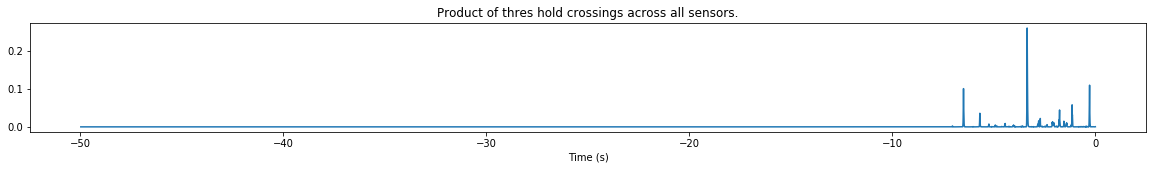

In [35]:
#Threshold 0.01
plot_thres_crossings_product("./data/Ramp12d/", time_range = (-50, 0), window = 4000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


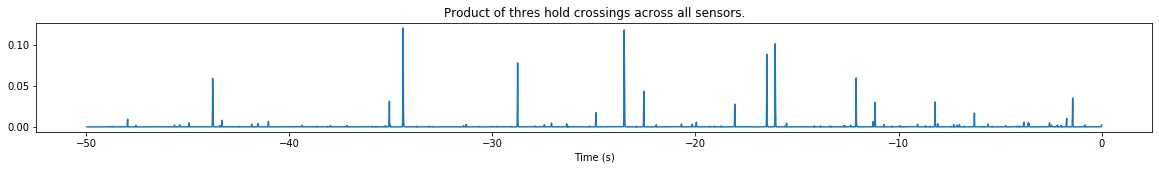

In [36]:
#Threshold 0.01
plot_thres_crossings_product("./data/Ramp19/", time_range = (-50, 0), window = 4000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


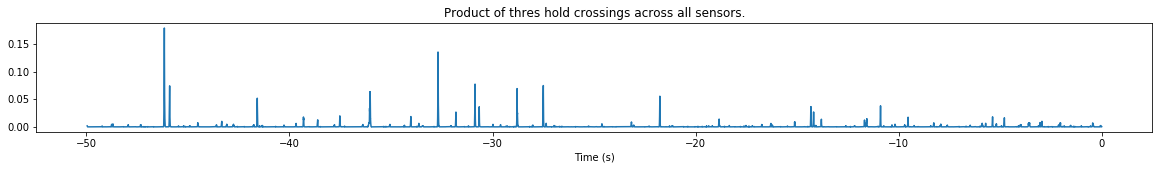

In [37]:
#Threshold 0.01
plot_thres_crossings_product("./data/Ramp20/", time_range = (-50, 0), window = 4000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


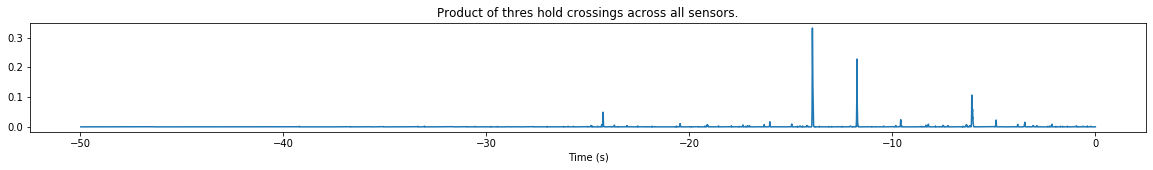

In [38]:
#Threshold 0.01
plot_thres_crossings_product("./data/Ramp21/", time_range = (-50, 0), window = 4000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


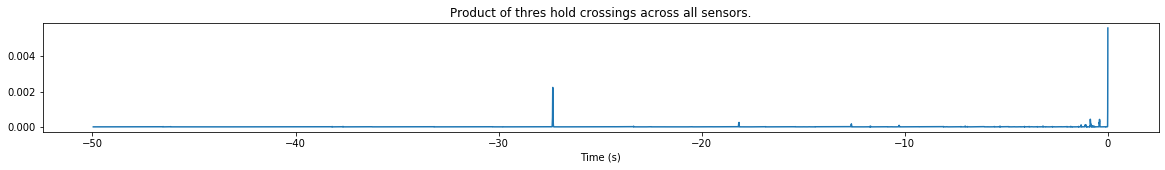

In [39]:
#Threshold 0.01
plot_thres_crossings_product("./data/Ramp22/", time_range = (-50, 0), window = 4000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


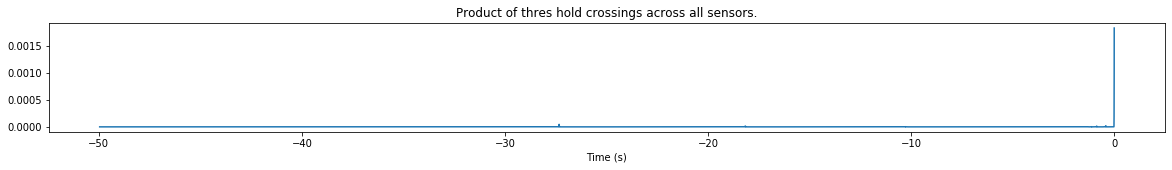

In [58]:
#Threshold 0.015
plot_thres_crossings_product("./data/Ramp22/", time_range = (-50, 0), window = 4000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


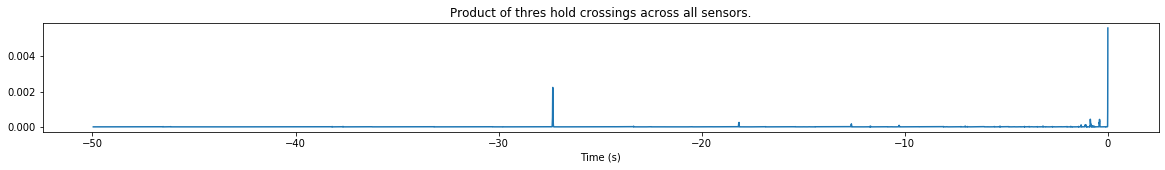

In [39]:
#Threshold 0.01
plot_thres_crossings_product("./data/Ramp22/", time_range = (-50, 0), window = 4000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


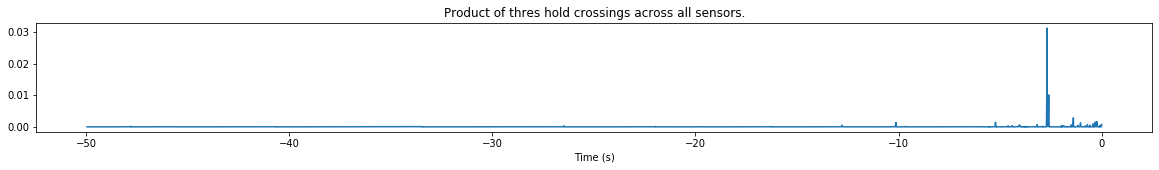

In [40]:
#Threshold 0.01
plot_thres_crossings_product("./data/Ramp23/", time_range = (-50, 0), window = 4000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


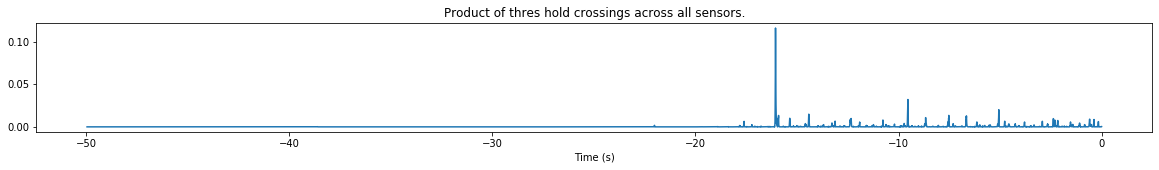

In [41]:
#Threshold 0.01
plot_thres_crossings_product("./data/Ramp24/", time_range = (-50, 0), window = 4000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


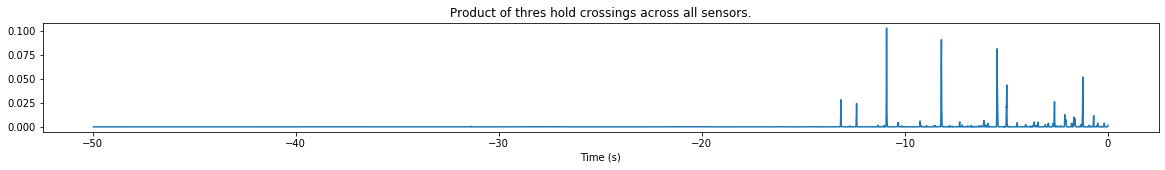

In [42]:
#Threshold 0.01
plot_thres_crossings_product("./data/Ramp25/", time_range = (-50, 0), window = 4000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


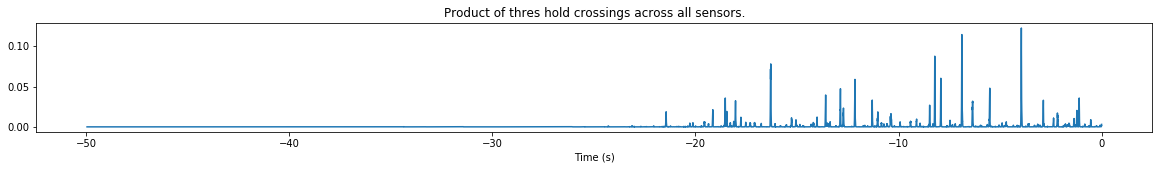

In [43]:
#Threshold 0.01
plot_thres_crossings_product("./data/Ramp26/", time_range = (-50, 0), window = 4000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


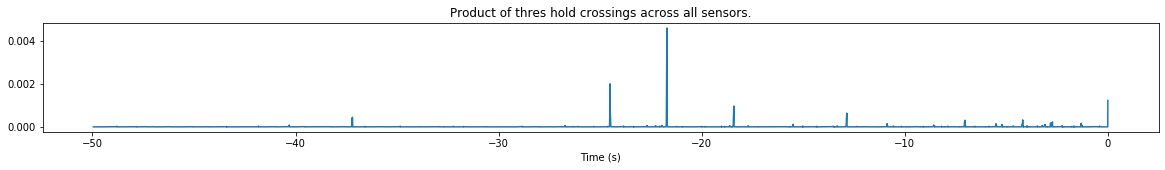

In [44]:
#Threshold 0.01
plot_thres_crossings_product("./data/Ramp27/", time_range = (-50, 0), window = 4000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


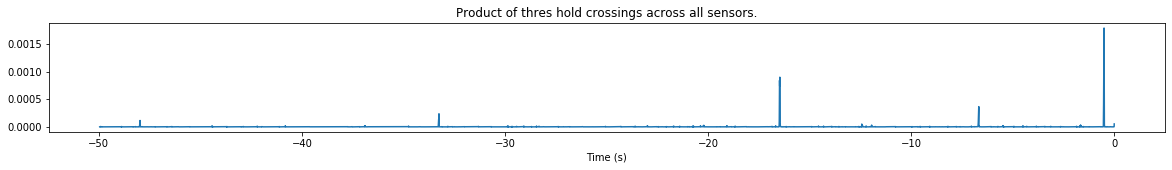

In [45]:
#Threshold 0.01
plot_thres_crossings_product("./data/Ramp28/", time_range = (-50, 0), window = 4000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


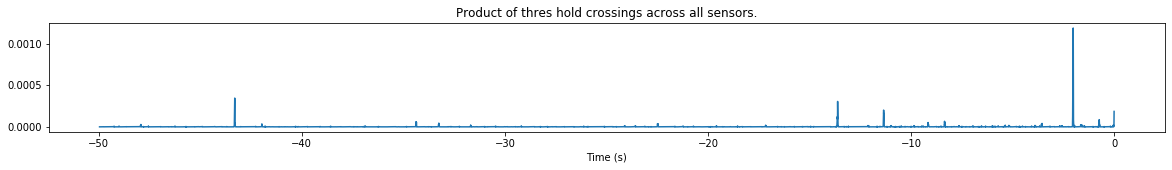

In [46]:
#Threshold 0.01
plot_thres_crossings_product("./data/Ramp29/", time_range = (-50, 0), window = 4000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


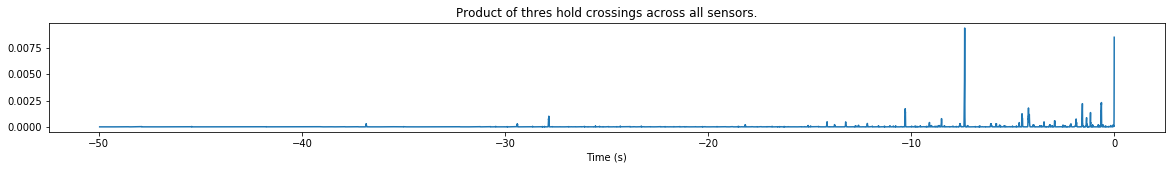

In [47]:
#Threshold 0.01
plot_thres_crossings_product("./data/Ramp30/", time_range = (-50, 0), window = 4000)

## Amplitude distribution in Ramp 22

Flushing input history


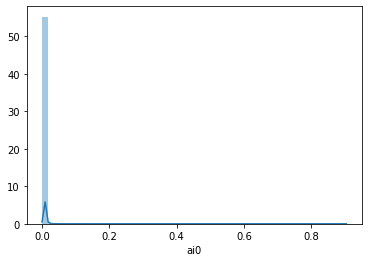

In [6]:
plot_amplitude_distribution("./data/Ramp22/", "ai0", time_range = (-500, -100e-3))

Flushing input history


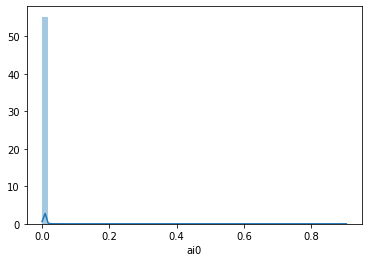

In [8]:
plot_amplitude_distribution("./data/Ramp22/", "ai0", time_range = (-450, -350))

Flushing input history


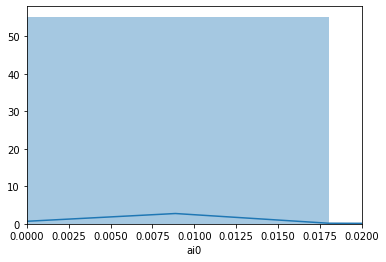

In [15]:
plot_amplitude_distribution("./data/Ramp22/", "ai0", time_range = (-450, -350), limit = [0,0.02])

Flushing input history


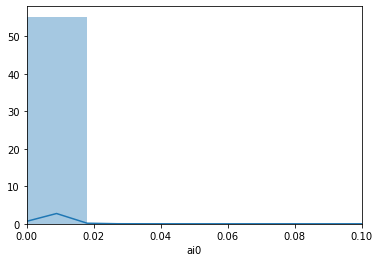

In [16]:
plot_amplitude_distribution("./data/Ramp22/", "ai0", time_range = (-450, -350), limit = [0,0.1])

Flushing input history


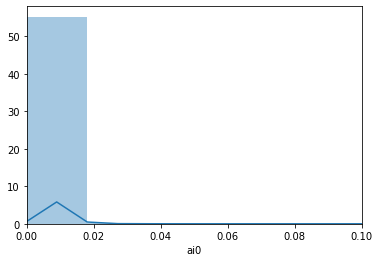

In [17]:
plot_amplitude_distribution("./data/Ramp22/", "ai0", time_range = (-500, -100e-3),  limit = [0,0.1])

Flushing input history


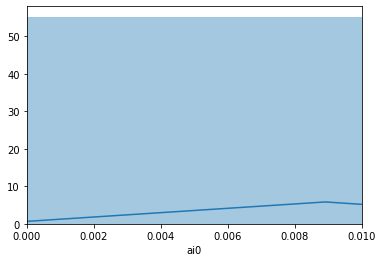

In [18]:
plot_amplitude_distribution("./data/Ramp22/", "ai0", time_range = (-500, -100e-3),  limit = [0,0.01])

Flushing input history


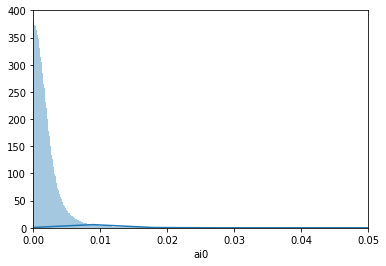

In [3]:
plot_amplitude_distribution("./data/Ramp22/", "ai0", time_range = (-500, -100e-3),  limit = [0,0.05])

## Log scale

Flushing input history


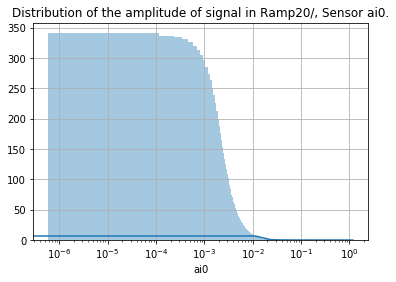

In [4]:
plot_amplitude_distribution("./data/Ramp20/", "ai0", time_range = (-500, -100e-3))

Flushing input history


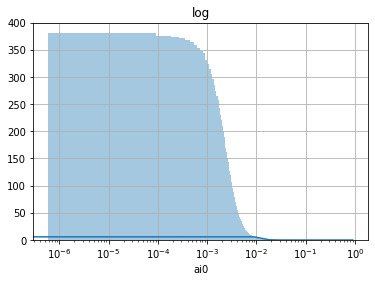

In [8]:
plot_amplitude_distribution("./data/Ramp22/", "ai0", time_range = (-500, -100e-3))

Flushing input history


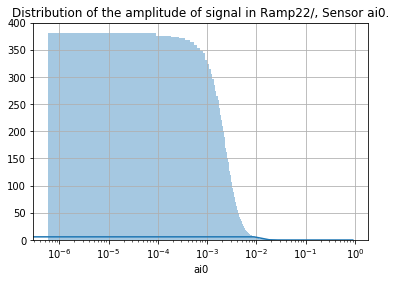

In [13]:
plot_amplitude_distribution("./data/Ramp22/", "ai0", time_range = (-500,0))

Flushing input history


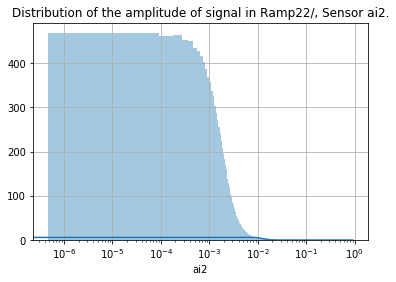

In [14]:
plot_amplitude_distribution("./data/Ramp22/", "ai2", time_range = (-500,0))

Flushing input history
Flushing input history


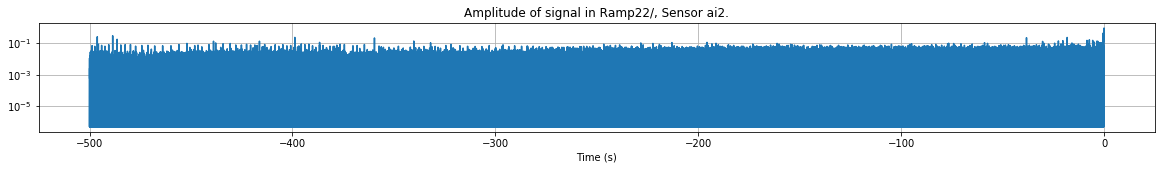

In [18]:
plot_amp_with_time("./data/Ramp22/", "ai2", time_range = (-500,0))

Flushing input history
Flushing input history


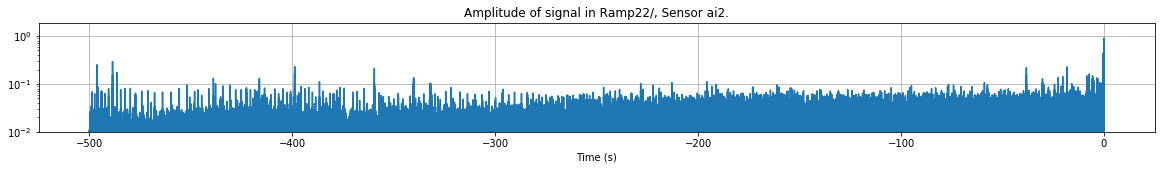

In [24]:
plot_amp_with_time("./data/Ramp22/", "ai2", time_range = (-500,0))

Flushing input history
Flushing input history


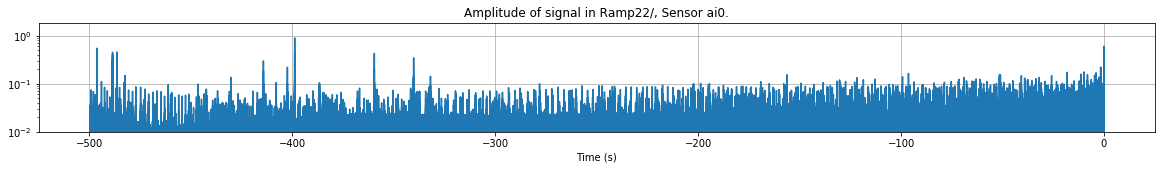

In [25]:
plot_amp_with_time("./data/Ramp22/", "ai0", time_range = (-500,0))

## Amplitude scale for quieter ramps

Flushing input history
Flushing input history


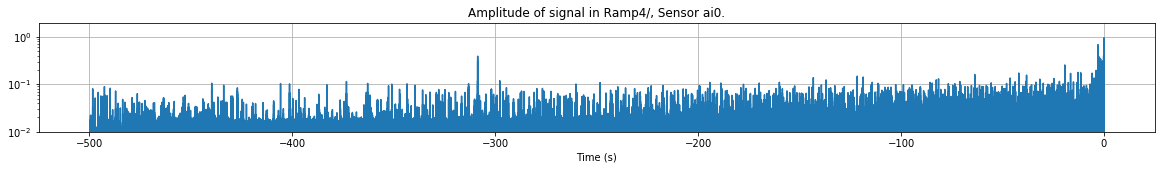

In [26]:
plot_amp_with_time("./data/Ramp4/", "ai0", time_range = (-500,0))

Flushing input history
Flushing input history


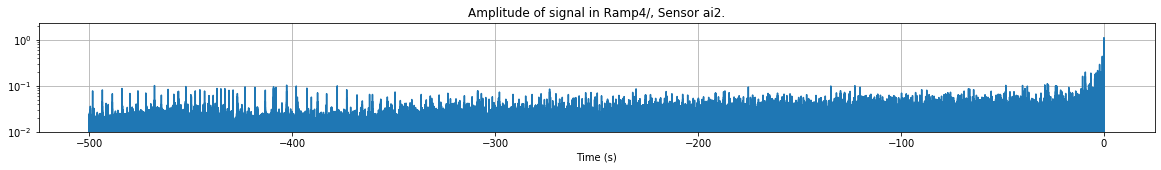

In [27]:
plot_amp_with_time("./data/Ramp4/", "ai2", time_range = (-500,0))

Flushing input history
Flushing input history


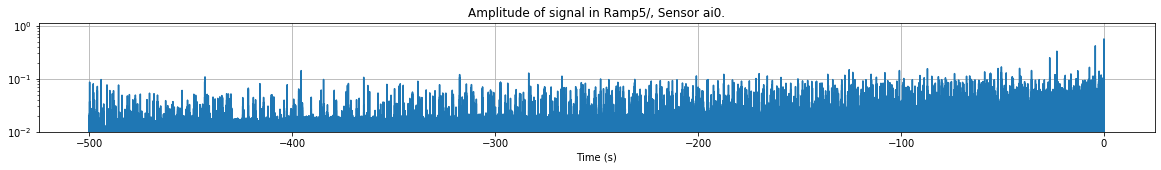

In [28]:
plot_amp_with_time("./data/Ramp5/", "ai0", time_range = (-500,0))

Flushing input history
Flushing input history


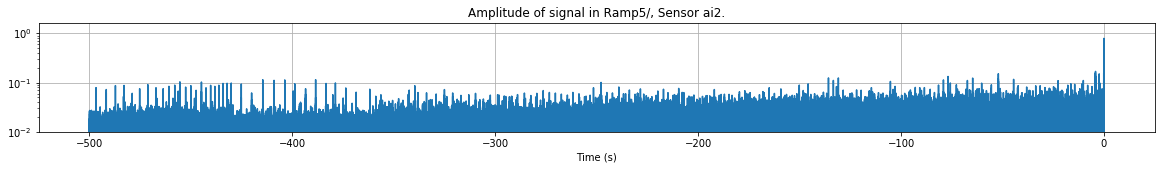

In [29]:
plot_amp_with_time("./data/Ramp5/", "ai2", time_range = (-500,0))

Flushing input history
Flushing input history


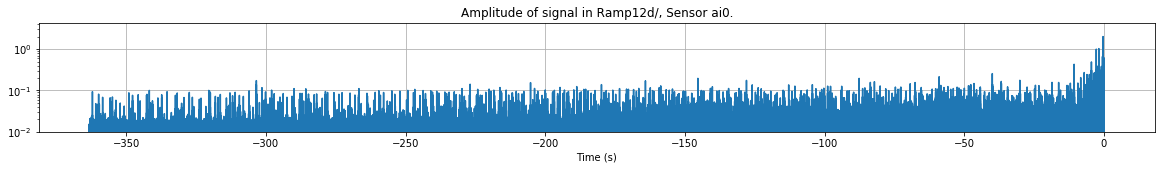

In [30]:
plot_amp_with_time("./data/Ramp12d/", "ai0", time_range = (-500,0))

Flushing input history
Flushing input history


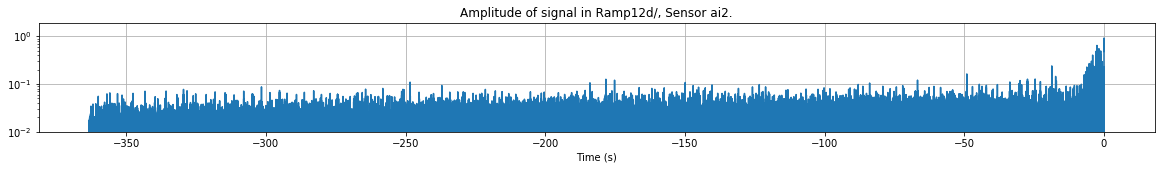

In [31]:
plot_amp_with_time("./data/Ramp12d/", "ai2", time_range = (-500,0))

Flushing input history
Flushing input history


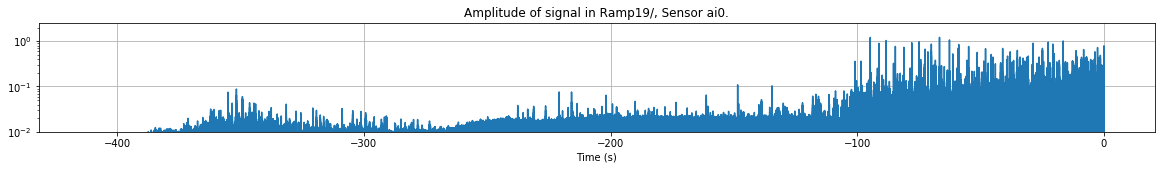

In [32]:
plot_amp_with_time("./data/Ramp19/", "ai0", time_range = (-500,0))

Flushing input history
Flushing input history


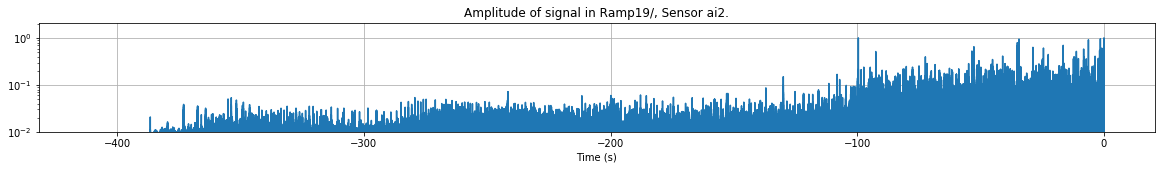

In [33]:
plot_amp_with_time("./data/Ramp19/", "ai2", time_range = (-500,0))

Flushing input history
Flushing input history


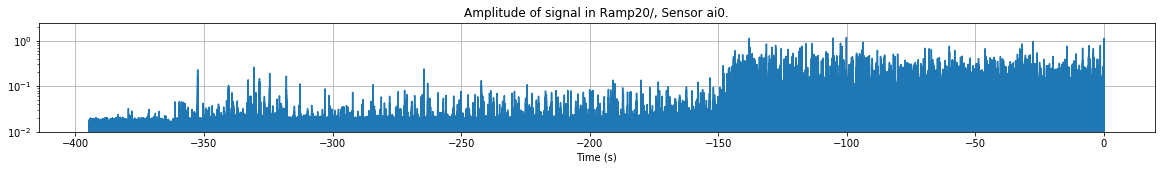

In [34]:
plot_amp_with_time("./data/Ramp20/", "ai0", time_range = (-500,0))

Flushing input history
Flushing input history


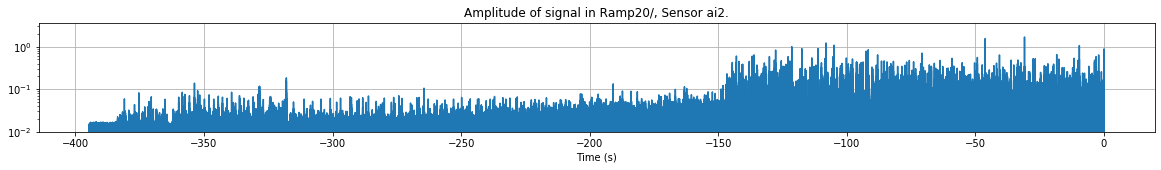

In [35]:
plot_amp_with_time("./data/Ramp20/", "ai2", time_range = (-500,0))

Flushing input history
Flushing input history


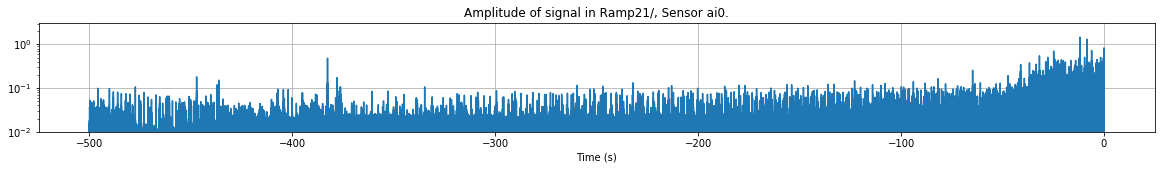

In [36]:
plot_amp_with_time("./data/Ramp21/", "ai0", time_range = (-500,0))

Flushing input history
Flushing input history


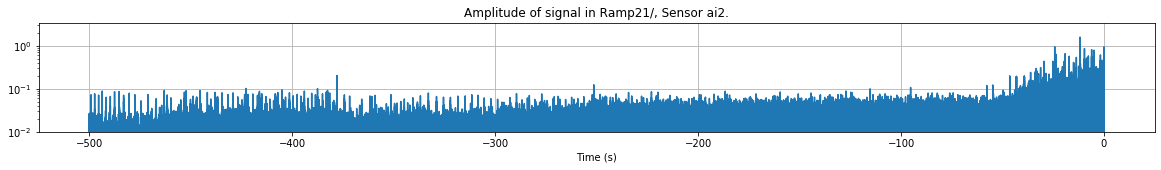

In [37]:
plot_amp_with_time("./data/Ramp21/", "ai2", time_range = (-500,0))

Flushing input history
Flushing input history


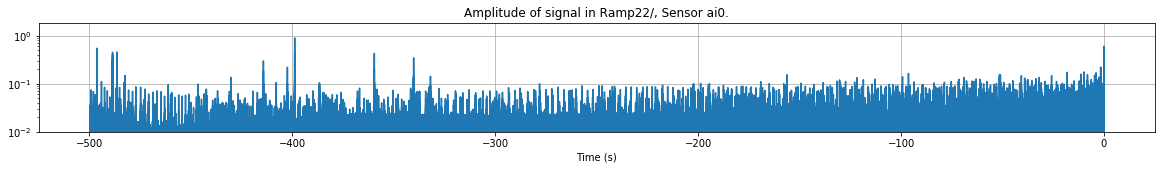

In [38]:
plot_amp_with_time("./data/Ramp22/", "ai0", time_range = (-500,0))

Flushing input history
Flushing input history


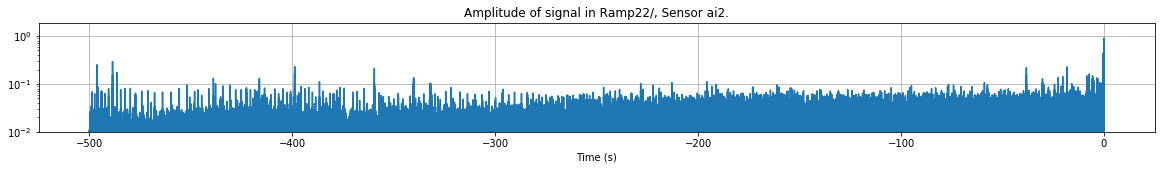

In [39]:
plot_amp_with_time("./data/Ramp22/", "ai2", time_range = (-500,0))

Flushing input history
Flushing input history


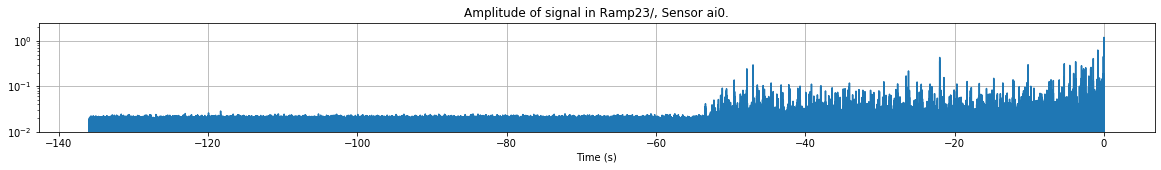

In [40]:
plot_amp_with_time("./data/Ramp23/", "ai0", time_range = (-500,0))

Flushing input history
Flushing input history


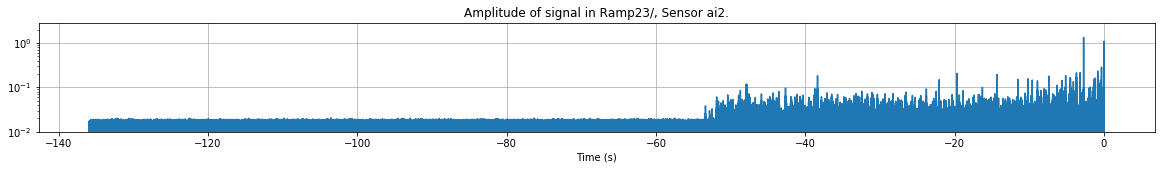

In [41]:
plot_amp_with_time("./data/Ramp23/", "ai2", time_range = (-500,0))

Flushing input history
Flushing input history


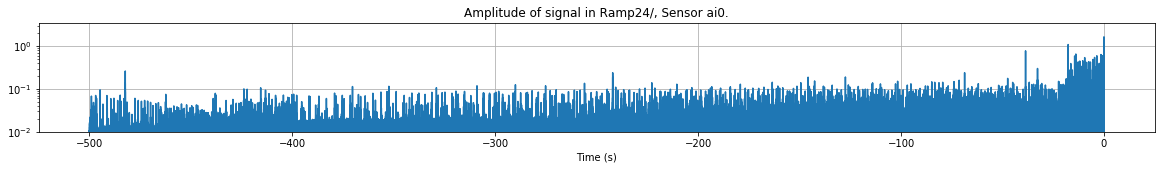

In [42]:
plot_amp_with_time("./data/Ramp24/", "ai0", time_range = (-500,0))

Flushing input history
Flushing input history


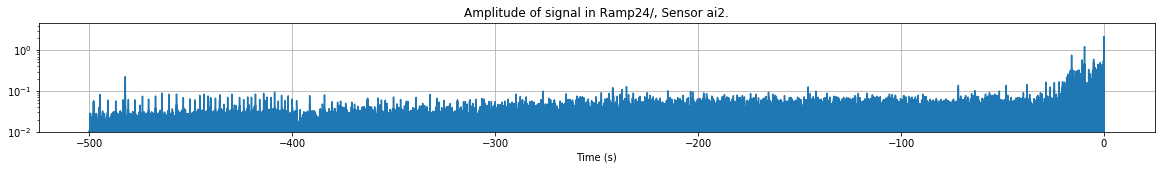

In [43]:
plot_amp_with_time("./data/Ramp24/", "ai2", time_range = (-500,0))

Flushing input history
Flushing input history


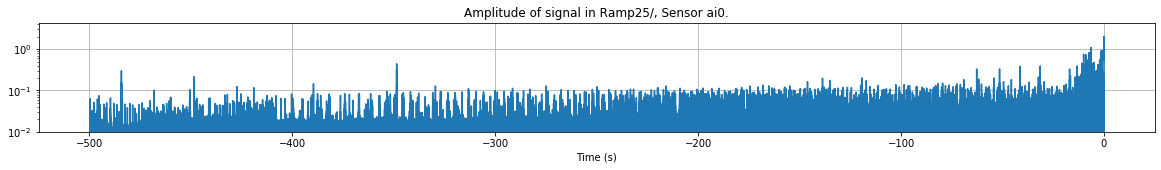

In [44]:
plot_amp_with_time("./data/Ramp25/", "ai0", time_range = (-500,0))

Flushing input history
Flushing input history


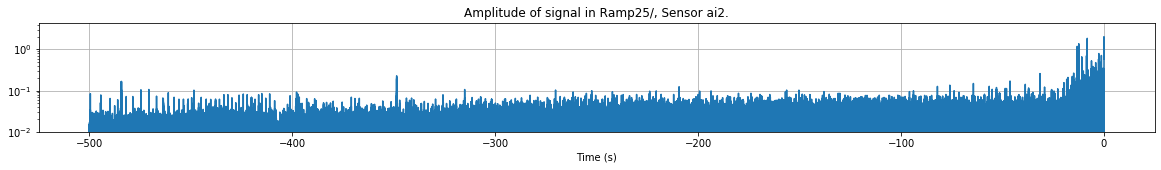

In [45]:
plot_amp_with_time("./data/Ramp25/", "ai2", time_range = (-500,0))

Flushing input history
Flushing input history


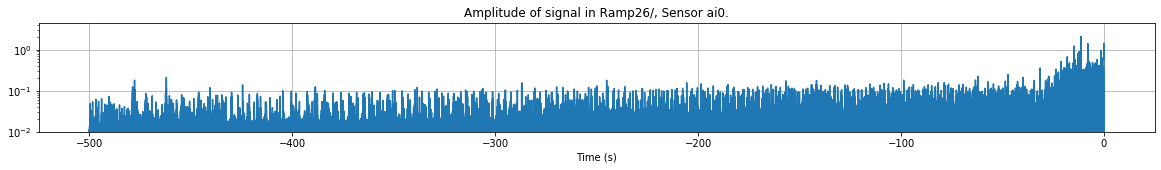

In [46]:
plot_amp_with_time("./data/Ramp26/", "ai0", time_range = (-500,0))

Flushing input history
Flushing input history


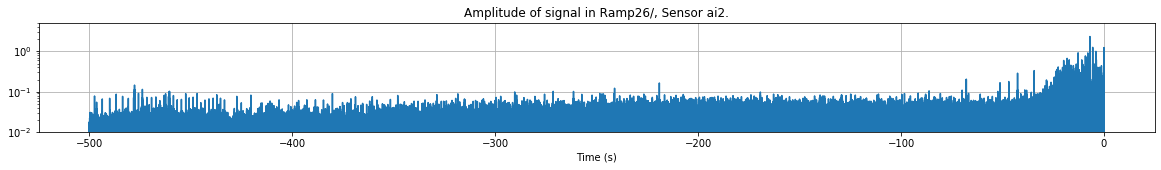

In [47]:
plot_amp_with_time("./data/Ramp26/", "ai2", time_range = (-500,0))

Flushing input history
Flushing input history


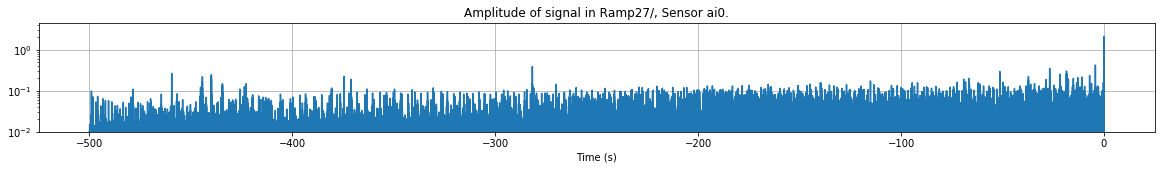

In [48]:
plot_amp_with_time("./data/Ramp27/", "ai0", time_range = (-500,0))

Flushing input history
Flushing input history


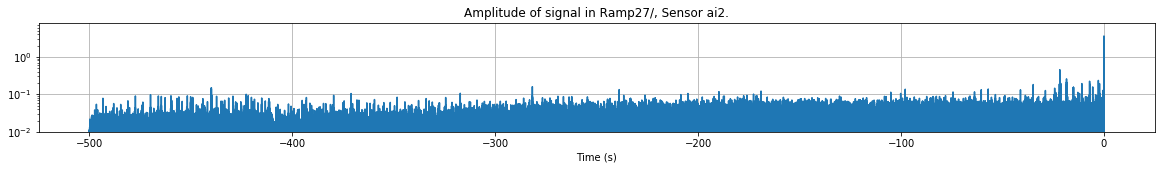

In [49]:
plot_amp_with_time("./data/Ramp27/", "ai2", time_range = (-500,0))

Flushing input history
Flushing input history


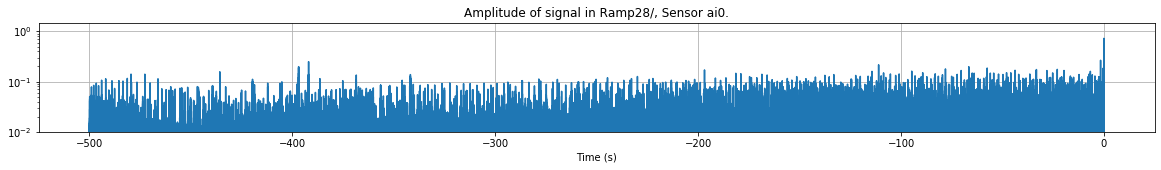

In [50]:
plot_amp_with_time("./data/Ramp28/", "ai0", time_range = (-500,0))

Flushing input history
Flushing input history


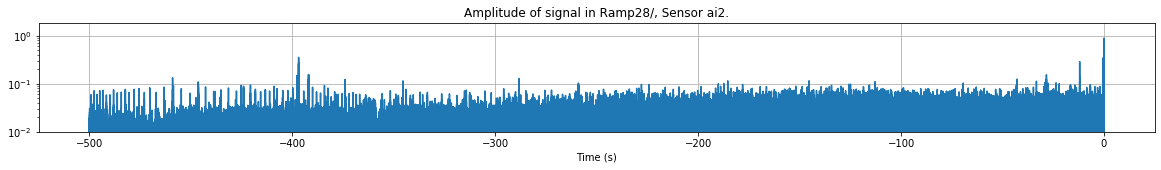

In [51]:
plot_amp_with_time("./data/Ramp28/", "ai2", time_range = (-500,0))

Flushing input history
Flushing input history


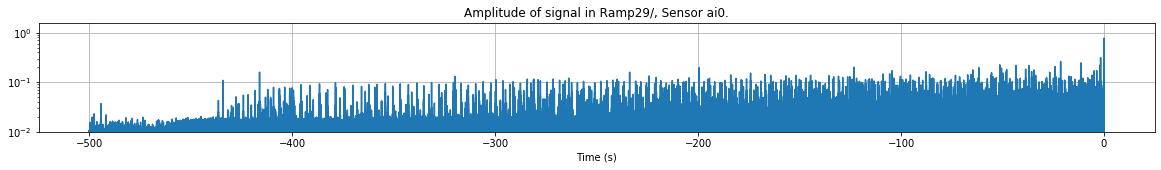

In [52]:
plot_amp_with_time("./data/Ramp29/", "ai0", time_range = (-500,0))

Flushing input history
Flushing input history


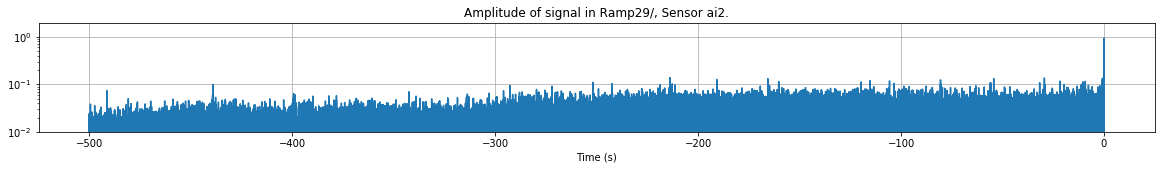

In [53]:
plot_amp_with_time("./data/Ramp29/", "ai2", time_range = (-500,0))

Flushing input history
Flushing input history


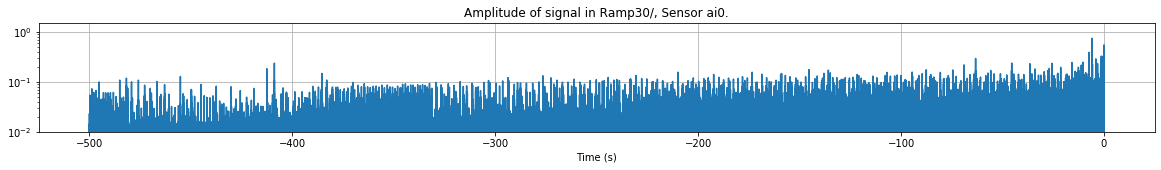

In [54]:
plot_amp_with_time("./data/Ramp30/", "ai0", time_range = (-500,0))

Flushing input history
Flushing input history


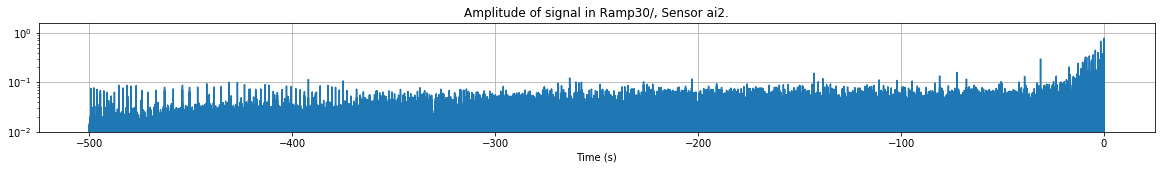

In [55]:
plot_amp_with_time("./data/Ramp30/", "ai2", time_range = (-500,0))